In [1]:
import sys
import pandas as pd
from helpers.plot_helper import PlotHelper

### Load JSON dataset by pandas

In [2]:
movie_rating_simple_dataframe = pd.read_json('../data/movieratings_simple.json')
movie_rating_simple_dict = movie_rating_simple_dataframe.to_dict()

### Display dataset

In [3]:
movie_rating_simple_dataframe = movie_rating_simple_dataframe.transpose()
movie_rating_simple_dataframe

,Forrest Gump,Fight Club
saeed,3,1
abbas,5,2
mahdi,4,1
hasan,4,5
alireza,5,3


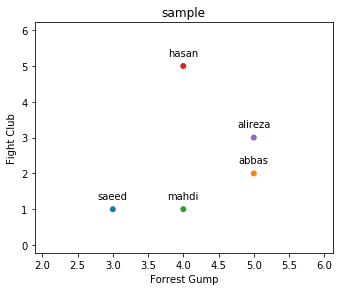

In [4]:
PlotHelper(movie_rating_simple_dict).draw_plot('Forrest Gump','Fight Club')

### distance metric implementation

In [5]:
def get_manhattan_distance(rating1,rating2):
    distance = 0
    for key in rating1:
        if key in rating2:
            distance += abs(rating1[key] - rating2[key])
    return distance

dt=movie_rating_simple_dict

print('abbas-hasan:%s'%+get_manhattan_distance(dt['abbas'],dt['hasan']))
print('abbas-alireza:%s'%get_manhattan_distance(dt['abbas'],dt['alireza']))
print('abbas-mahdi:%s'%+get_manhattan_distance(dt['abbas'],dt['mahdi']))
print('abbas-saeed:%s'%+get_manhattan_distance(dt['abbas'],dt['saeed']))

abbas-hasan:4
abbas-alireza:1
abbas-mahdi:2
abbas-saeed:3


In [6]:
def get_euclidean_distance(rating1,rating2):
    distance = 0
    for key in rating1:
        if key in rating2:
            distance += pow(abs(rating1[key]-rating2[key]), 2)
    return pow(distance, 1/2)

dt=movie_rating_simple_dict

print('abbas-hasan:%f'%+get_euclidean_distance(dt['abbas'],dt['hasan']))
print('abbas-alireza:%f'%get_euclidean_distance(dt['abbas'],dt['alireza']))
print('abbas-mahdi:%f'%+get_euclidean_distance(dt['abbas'],dt['mahdi']))
print('abbas-saeed:%f'%+get_euclidean_distance(dt['abbas'],dt['saeed']))

abbas-hasan:3.162278
abbas-alireza:1.000000
abbas-mahdi:1.414214
abbas-saeed:2.236068


In [7]:
def get_chebychev_distance(rating1,rating2):
    distance = 0
    for key in rating1:
        if key in rating2:
            candidate_distance = abs(rating1[key] - rating2[key])
            if(candidate_distance>distance):
                distance = candidate_distance            
    return distance

dt=movie_rating_simple_dict

print('abbas-hasan:%s'%+get_chebychev_distance(dt['abbas'],dt['hasan']))
print('abbas-alireza:%s'%get_chebychev_distance(dt['abbas'],dt['alireza']))
print('abbas-mahdi:%s'%+get_chebychev_distance(dt['abbas'],dt['mahdi']))
print('abbas-saeed:%s'%+get_chebychev_distance(dt['abbas'],dt['saeed']))

abbas-hasan:3
abbas-alireza:1
abbas-mahdi:1
abbas-saeed:2


In [8]:
def get_minkowski_distance(rating1, rating2, q):
    distance = 0
    commonRatings = False
    for key in rating1:
        if key in rating2:
            distance += pow(abs(rating1[key]-rating2[key]), q)
            commonRatings = True
    if(commonRatings):
        return pow(distance, 1/q)
    else:
        return 0
        
dt=movie_rating_simple_dict

print('q=1 abbas-hasan:%f'%get_minkowski_distance(dt['abbas'],dt['hasan'],1))
print('q=2 abbas-hasan:%f'%+get_minkowski_distance(dt['abbas'],dt['hasan'],2))
print('q=3 abbas-hasan:%f'%+get_minkowski_distance(dt['abbas'],dt['hasan'],300))

q=1 abbas-hasan:4.000000
q=2 abbas-hasan:3.162278
q=3 abbas-hasan:3.000000
